In [1]:
using JLD2
using Plots
using VoronoiCells
using GeometryBasics
using Meshfree4ScalarEq.ParticleGrids
plotlyjs()

Plots.PlotlyJSBackend()

In [2]:
function getMassLossData(Nx::Integer)
    dataFolder = "$(@__DIR__)/../L2Stability2D/data/"
    algList = Vector{String}(undef, 0)
    fileList = Vector{String}(undef, 0)
    for file in readdir(dataFolder)
        if contains(file, "$(Nx)") && (file[end-2:end] != "txt") && (file[end-2:end] != "pdf") && (file[end-1:end] == "_1")
            alg = split(file, "_")[1]
            push!(algList, alg)
            push!(fileList, dataFolder*file)
        end
    end

    D = Dict{String, Matrix{Float64}}()
    for (j, file) in enumerate(fileList)
        steps = count((contains(t, "step" ) for t in readdir(file * "/data/")))
        data = Matrix{Float64}(undef, steps, 2)
        i = 1
        for dataFile in readdir(file * "/data/")
            if contains(dataFile, "step")
                d = load(file * "/data/" * dataFile)
                data[i, 1] = d["time"]
                data[i, 2] = sum(particle ->  particle.rho*particle.volume, d["particleGrid"].grid)
                i += 1
            end
        end
        # println(algList[j], " ", data)

        # Sort increase time
        perm = sortperm(data[:, 1])
        data[:, 1] .= data[perm, 1]
        data[:, 2] .= data[perm, 2]

        # Normalise 
        data[:, 2] .= data[:, 2]/data[1, 2]

        # Save to dict
        D[algList[j]] = data
    end
    return D, algList
end

getMassLossData (generic function with 1 method)

In [3]:
D70, algList70 = getMassLossData(70);

Not enough save points in L2Stability data to plot the mass as a function of time...

┌ Warning: attempting to remove probably stale pidfile
│   path = /net/nascip131/users/cip/techno1/cac13ruw/.jlassetregistry.lock
└ @ Pidfile /users/cip/techno1/cac13ruw/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


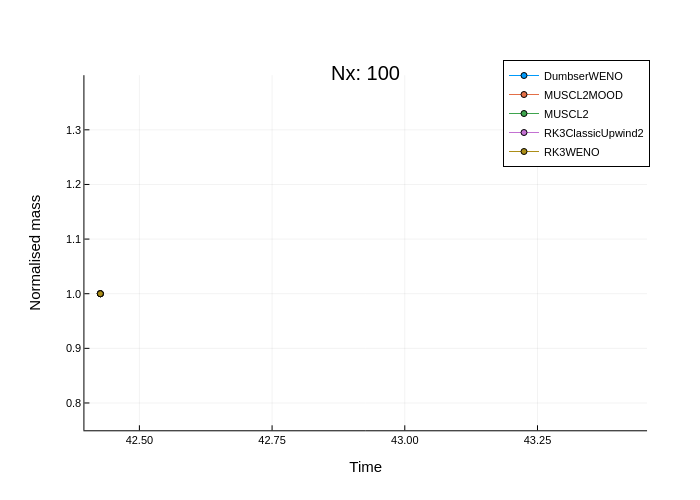

In [5]:
ms = 3
p1 = plot(D70[algList70[1]][:, 1], D70[algList70[1]][:, 2], xlabel="Time", ylabel="Normalised mass", ylim=(0.75, 1.4), label=algList70[1], markershape=:circle, size=(800, 600), legend=:topright, ms=ms, title="Nx: $(100)")
for (j, algStr) in enumerate(algList70)
    if algStr != algList70[1]
        plot!(p1, D70[algStr][:, 1], D70[algStr][:, 2], label=algList70[j], markershape=:circle, ms=ms)
    end
end
display(p1)